# Preparation des données
### Initialisation du projet

In [253]:
# imports
import numpy as np
import os

from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(420) 

# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# où sauver les figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "projet"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "img") # le dossier doit exister

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=500):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


### Importation des données (csv)

In [254]:
import os
import pandas as pd

DATASETS_PATH = os.path.join("..\datasets")

def load_datasets_data(dataset_path=DATASETS_PATH):
	csv_general = pd.read_csv(os.path.join(dataset_path, "general_data.csv"))
	csv_manager = pd.read_csv(os.path.join(dataset_path, "manager_survey_data.csv"))
	csv_employee = pd.read_csv(os.path.join(dataset_path, "employee_survey_data.csv"))
	csv_intime = pd.read_csv(os.path.join(dataset_path, "in_time.csv"))
	csv_outtime = pd.read_csv(os.path.join(dataset_path, "out_time.csv"))
	return csv_general, csv_manager, csv_employee, csv_intime, csv_outtime

In [255]:
general_set, manager_set, employee_set, intime_set, outtime_set = load_datasets_data()

### Fusion des donnée indexé sur EmployeeID

In [256]:
dataset_merge = general_set.merge(employee_set.merge(manager_set, on="EmployeeID"), on="EmployeeID")
dataset = dataset_merge.copy()


### Traitement des informations d'entrée et de sortie

In [257]:
intime_set.info()
# outtime_set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [258]:
intime_set.shape


(4410, 262)

In [259]:
intime_set = intime_set.replace(np.nan, 0)

In [260]:
intime_set.iloc[:, 1:] = intime_set.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

In [261]:
intime_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: datetime64[ns](261), int64(1)
memory usage: 8.8 MB


In [262]:
outtime_set = outtime_set.replace(np.nan, 0)
outtime_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


In [263]:
outtime_set.iloc[:, 1:] = outtime_set.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')


In [264]:
intime_set = intime_set.append(outtime_set)
intime_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8820 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: datetime64[ns](261), int64(1)
memory usage: 17.7 MB


In [265]:
intime_set = intime_set.diff(periods=4410)
intime_set = intime_set.iloc[4410:]
intime_set.reset_index(inplace=True)

C:\Users\cruel\AppData\Local\Temp/ipykernel_12516/687009886.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  intime_set.reset_index(inplace=True)


In [266]:
intime_set.drop(columns=['index', 'Unnamed: 0'],axis=1, inplace=True)
intime_set.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [267]:
intime_set.shape

(4410, 261)

In [268]:
intime_set.drop(['2015-01-01', '2015-01-14','2015-01-26','2015-03-05',
            '2015-05-01','2015-07-17','2015-09-17','2015-10-02',
            '2015-11-09','2015-11-10','2015-11-11','2015-12-25'
], axis = 1,inplace=True)

In [269]:
intime_set['Actual Time']=intime_set.mean(axis=1)

In [270]:
intime_set['Actual Time'].head()

0   0 days 06:52:12.823293172
1   0 days 07:18:57.493975903
2   0 days 06:48:57.891566265
3   0 days 06:47:21.172690763
4   0 days 07:52:39.220883534
Name: Actual Time, dtype: timedelta64[ns]

In [271]:
intime_set['hrs']=intime_set['Actual Time']/np.timedelta64(1,'h')


In [272]:
intime_set.reset_index(inplace=True)

In [273]:
intime_set.drop(intime_set.columns.difference(['index','hrs']), 1, inplace=True)

C:\Users\cruel\AppData\Local\Temp/ipykernel_12516/280449017.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  intime_set.drop(intime_set.columns.difference(['index','hrs']), 1, inplace=True)


In [274]:
intime_set.rename(columns={'index': 'EmployeeID'}, inplace=True)
intime_set.head()

,EmployeeID,hrs
0,0,6.870229
1,1,7.315971
2,2,6.816081
3,3,6.789215
4,4,7.877561


In [275]:
dataset = dataset.merge(intime_set, on="EmployeeID")

### Nettoyage des données / Complétion

In [276]:
#https://prod.liveshare.vsengsaas.visualstudio.com/join?6712A4B62ABC55A3AC374AFD25A834927C4D

incomplete_attributes = ["NumCompaniesWorked","JobSatisfaction","EnvironmentSatisfaction","WorkLifeBalance", "TotalWorkingYears"]

for attribute in incomplete_attributes:
	median = dataset[attribute].median()
	dataset[attribute].fillna(median, inplace=True) # option 3

#Autre methode
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(missing_values=np.nan, strategy="median")

In [277]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4409 entries, 0 to 4408
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4409 non-null   int64  
 1   Attrition                4409 non-null   object 
 2   BusinessTravel           4409 non-null   object 
 3   Department               4409 non-null   object 
 4   DistanceFromHome         4409 non-null   int64  
 5   Education                4409 non-null   int64  
 6   EducationField           4409 non-null   object 
 7   EmployeeCount            4409 non-null   int64  
 8   EmployeeID               4409 non-null   int64  
 9   Gender                   4409 non-null   object 
 10  JobLevel                 4409 non-null   int64  
 11  JobRole                  4409 non-null   object 
 12  MaritalStatus            4409 non-null   object 
 13  MonthlyIncome            4409 non-null   int64  
 14  NumCompaniesWorked      

In [278]:
rawArray = ["Age","DistanceFromHome","Education","TotalWorkingYears",
	"TrainingTimesLastYear","YearsAtCompany","YearsSinceLastPromotion","YearsWithCurrManager",
	"EnvironmentSatisfaction", "JobSatisfaction", "WorkLifeBalance","JobInvolvement", "NumCompaniesWorked", "hrs"]

dataset_yes = dataset.where(dataset["Attrition"]=="Yes", 0)
dataset_no  = dataset.where(dataset["Attrition"]=="No", 1)

dataset_yes = dataset_yes.loc[dataset_yes["Attrition"] != 0]
dataset_no = dataset_no.loc[dataset_no["Attrition"] != 1]

print("Attrition NO: ", len(dataset_no) ," Attrition YES: ", len(dataset_yes))

# Uncomment o have graph (1, boxplot | 2, Histogram)

# for col in rawArray:
#     plt.boxplot([dataset_yes[col].apply(np.int64), dataset_no[col].apply(np.int64)])
#     print(col)
#     plt.show()

# for col in rawArray:
# 	print(col)
# 	plt.hist(dataset_yes[col].apply(np.int64), color="red", edgecolor='black', linewidth=1.2,bins=20)
# 	plt.show()
# 	plt.hist(dataset_no[col].apply(np.int64), color="green", edgecolor='black', linewidth=1.2,bins=20)
# 	plt.show()

Attrition NO:  3698  Attrition YES:  711


#### Séparation des données et de la colonne attrition

In [279]:
# Data frame is created under column name Name and Attrition
data_frame = pd.DataFrame(dataset, columns=["Attrition"])

# Data of Attrition is converted into Binary Data
df_one = pd.get_dummies(data_frame["Attrition"])

# Binary Data is Concatenated into Dataframe
df_two = pd.concat((df_one, data_frame), axis=1)

# Attritioncolumn is dropped
df_two = df_two.drop(["Attrition"], axis=1)

# We want Male =0 and Female =1 So we drop Male column here
df_two = df_two.drop(["No"], axis=1)

# Rename the Column
result = df_two.rename(columns={"Yes": "Attrition"})

dataset_test = dataset.copy()
dataset_test["Attrition"] = result["Attrition"]

In [280]:
dataset_test.corr()["Attrition"]

Age                       -0.159177
Attrition                  1.000000
DistanceFromHome          -0.009505
Education                 -0.015103
EmployeeCount                   NaN
EmployeeID                -0.004559
JobLevel                  -0.010296
MonthlyIncome             -0.031199
NumCompaniesWorked         0.041963
PercentSalaryHike          0.032449
StandardHours                   NaN
StockOptionLevel          -0.006932
TotalWorkingYears         -0.170183
TrainingTimesLastYear     -0.049219
YearsAtCompany            -0.134247
YearsSinceLastPromotion   -0.032995
YearsWithCurrManager      -0.156100
EnvironmentSatisfaction   -0.101814
JobSatisfaction           -0.103047
WorkLifeBalance           -0.062944
JobInvolvement            -0.015416
PerformanceRating          0.023362
hrs                        0.000704
Name: Attrition, dtype: float64

In [281]:
dataset.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,hrs
count,4409.000000,4409.000000,4409.000000,4409.0,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.0,...,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000,4409.000000
mean,36.923112,9.188251,2.912905,1.0,2205.000000,2.063960,65031.660240,2.692447,15.210252,8.0,...,2.798594,7.004990,2.187571,4.122023,2.725561,2.729417,2.763438,2.729644,3.153776,7.314463
std,9.134220,8.100992,1.024048,0.0,1272.912998,1.106814,47073.969139,2.493865,3.659203,0.0,...,1.288222,6.122203,3.222042,3.566975,1.089665,1.099021,0.703612,0.711223,0.360775,1.330903
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,5.416880
25%,30.000000,2.000000,2.000000,1.0,1103.000000,1.000000,29110.000000,1.000000,12.000000,8.0,...,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,6.278995
50%,36.000000,7.000000,3.000000,1.0,2205.000000,2.000000,49080.000000,2.000000,14.000000,8.0,...,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,7.011237
75%,43.000000,14.000000,4.000000,1.0,3307.000000,3.000000,83800.000000,4.000000,18.000000,8.0,...,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000,7.900932
max,60.000000,29.000000,5.000000,1.0,4409.000000,5.000000,199990.000000,9.000000,25.000000,8.0,...,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000,10.937261


## Pipeline	

Séparation du dataset en deux partie : les valeurs numeriques et les chaines de caractères

In [282]:
dataset_pl = dataset.copy()
ds_num = dataset_pl.select_dtypes(include=[np.number])
ds_str = dataset_pl.select_dtypes(exclude=[np.number])

Ici on utilisera le OneHotEncodeur pour transformer les features qualitatives en plusieur colonnes

In [283]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

encoder = OneHotEncoder()
encoder.fit(ds_str)
# dataset.head(10)

num_attribs = list(ds_num)
str_attribs = list(ds_str)

num_pipeline = Pipeline([
	('imputer', SimpleImputer(strategy="median")),
	('std_scaler', StandardScaler()),			   
])

full_pipeline = ColumnTransformer([
	("num", num_pipeline, num_attribs),
	("str", encoder, str_attribs),
])

dataset_pipeline = full_pipeline.fit_transform(dataset_pl)
dataset_pipeline

array([[ 1.54129037, -0.39360769, -0.89156859, ...,  1.        ,
         0.        ,  1.        ],
       [-0.64852651,  0.10021498, -1.86819615, ...,  0.        ,
         1.        ,  1.        ],
       [-0.53903567,  0.96440465,  1.06168652, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.8675082 , -0.88743036,  1.06168652, ...,  0.        ,
         0.        ,  1.        ],
       [-1.30547158,  1.95204999, -0.89156859, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.55587277,  1.08786032, -0.89156859, ...,  0.        ,
         0.        ,  1.        ]])

On utiliseras "dataset_prepared" pour tout nos futures opérations

In [284]:
dataset_prepared = pd.DataFrame(
    dataset_pipeline,
    columns=list(np.concatenate((num_attribs, encoder.get_feature_names(str_attribs)))))

## Nettoyage de données

Ici on supprimera les données que l'on estime comme inutile
> - Attrition_No -> Car on se sert uniquement de Attrition_Yes
> - StandardHours -> Car sur leurs contract les employés ont tous les même horaires
> - EmployeeCount -> Est toujours égale à 1
> - EmployeeID -> N'est pas une données à prendre en considération
> - Over18_Y -> Tous les employés ont au dessus de 18 ans 

In [285]:
import pandas as pd, numpy as np, seaborn as sns,matplotlib.pyplot as plt
useless_value = ['Attrition_No','StandardHours','EmployeeCount','EmployeeID','Over18_Y']
dataset_prepared = dataset_prepared.drop(useless_value, axis = 1)
dataset_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4409 non-null   float64
 1   DistanceFromHome                   4409 non-null   float64
 2   Education                          4409 non-null   float64
 3   JobLevel                           4409 non-null   float64
 4   MonthlyIncome                      4409 non-null   float64
 5   NumCompaniesWorked                 4409 non-null   float64
 6   PercentSalaryHike                  4409 non-null   float64
 7   StockOptionLevel                   4409 non-null   float64
 8   TotalWorkingYears                  4409 non-null   float64
 9   TrainingTimesLastYear              4409 non-null   float64
 10  YearsAtCompany                     4409 non-null   float64
 11  YearsSinceLastPromotion            4409 non-null   float

#### Isolation des valeurs d'attritions pour de futures traitements

In [286]:
y = dataset_prepared['Attrition_Yes']
x = dataset_prepared.drop(['Attrition_Yes'], axis = 1)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                4409 non-null   float64
 1   DistanceFromHome                   4409 non-null   float64
 2   Education                          4409 non-null   float64
 3   JobLevel                           4409 non-null   float64
 4   MonthlyIncome                      4409 non-null   float64
 5   NumCompaniesWorked                 4409 non-null   float64
 6   PercentSalaryHike                  4409 non-null   float64
 7   StockOptionLevel                   4409 non-null   float64
 8   TotalWorkingYears                  4409 non-null   float64
 9   TrainingTimesLastYear              4409 non-null   float64
 10  YearsAtCompany                     4409 non-null   float64
 11  YearsSinceLastPromotion            4409 non-null   float

### Creation des sets d'entrainement et de test

In [287]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, stratify=y)

### Implémentation du model : Random Forest

Entrainement du modèle

In [288]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9924414210128496


#### Hiérarchisation des features

In [289]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
                        oob_score=False, random_state=None, verbose=0,
                        warm_start=False)

RandomForestClassifier(n_jobs=1)

In [290]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Age                                  0.071138
TotalWorkingYears                    0.070806
MonthlyIncome                        0.068048
YearsAtCompany                       0.056918
hrs                                  0.055126
DistanceFromHome                     0.049878
PercentSalaryHike                    0.045730
YearsWithCurrManager                 0.044753
NumCompaniesWorked                   0.044681
EnvironmentSatisfaction              0.034043
JobSatisfaction                      0.032754
YearsSinceLastPromotion              0.032072
WorkLifeBalance                      0.031182
TrainingTimesLastYear                0.030386
Education                            0.029266
JobLevel                             0.025941
JobInvolvement                       0.022873
MaritalStatus_Single                 0.022285
StockOptionLevel                     0.021540
BusinessTravel_Travel_Frequently     0.017232
EducationField_Life Sciences         0.011012
EducationField_Medical            

#### Visualisation de la hiérarchie

No handles with labels found to put in legend.


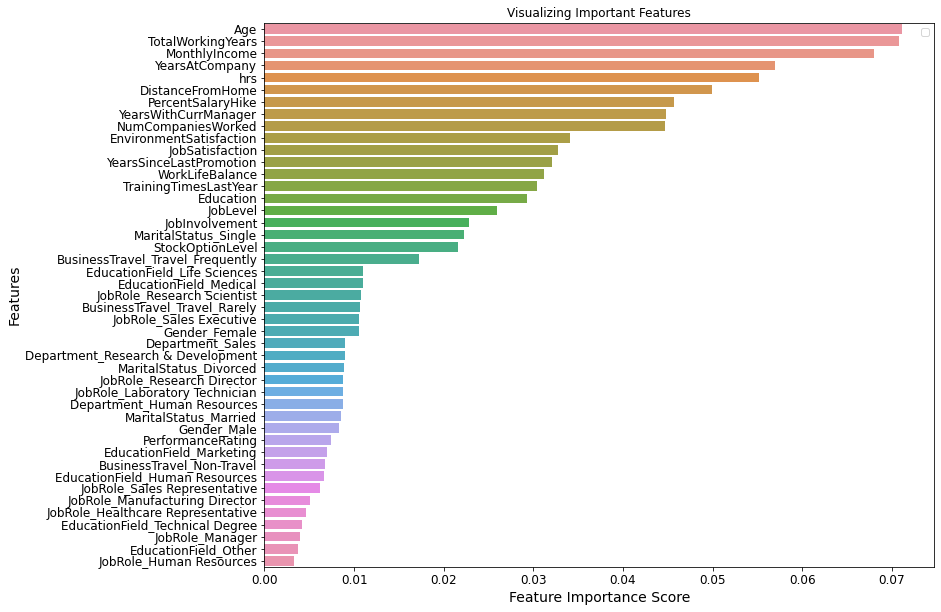

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
plt.figure(figsize=(12,10))
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# Performance et validation
### Cross validation et accuracy score

In [292]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9924414210128496


In [293]:
from sklearn.model_selection import cross_val_predict
rf_pred = cross_val_predict(clf, X_train, y_train, cv=3)
rf_pred

array([0., 0., 0., ..., 1., 1., 0.])

In [294]:
from sklearn.model_selection import cross_val_score
rf_score = cross_val_score(clf, X_train, y_train, cv=3, scoring="accuracy")
rf_score

array([0.94557823, 0.95626822, 0.94455253])

### Matrice de confusion

In [295]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1110,    0],
       [  10,  203]], dtype=int64)

### Precision score

In [296]:
from sklearn.metrics import precision_score, recall_score
fpr = precision_score(y_test, y_pred)
fpr

1.0

### classification report

In [297]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1110
         1.0       1.00      0.95      0.98       213

    accuracy                           0.99      1323
   macro avg       1.00      0.98      0.99      1323
weighted avg       0.99      0.99      0.99      1323



### Recall score

In [298]:
tpr = recall_score(y_test, y_pred)
tpr

0.9530516431924883

### F1 - score

In [299]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9759615384615384

In [300]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

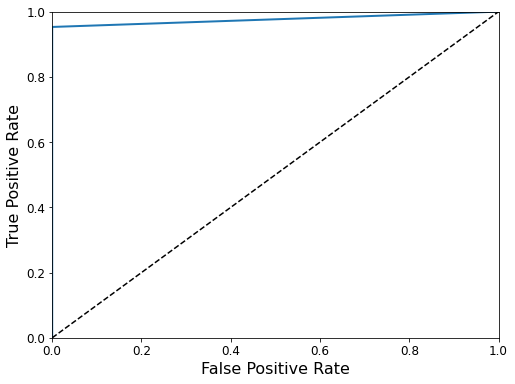

In [301]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
# save_fig("roc_curve_plot")
plt.show()

#### Creation de la courbre ROC


AUC - La courbe ROC est une mesure de performance pour les problèmes de classification à différents seuils. La courbe ROC est une courbe de probabilité et l'AUC représente le degré ou la mesure de la séparabilité. Elle indique dans quelle mesure le modèle est capable de faire la distinction entre les classes. Plus l'AUC est élevée, plus le modèle est capable de prédire que les classes 0 sont 0 et les classes 1 sont 1. Par analogie, plus l'AUC est élevée, plus le modèle est capable de distinguer les personne suceptible de quitter l'entreprise.

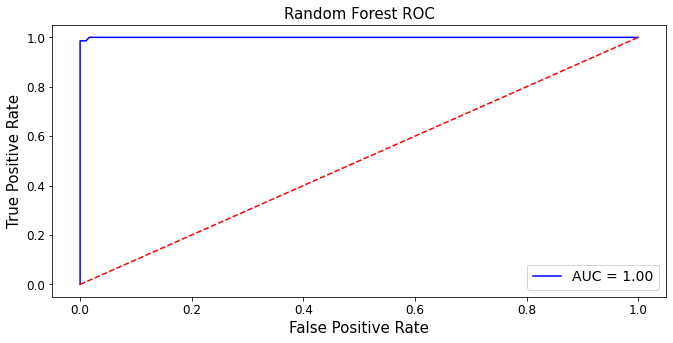

In [302]:
from sklearn import metrics

plt.figure(figsize=(11,5))

lrprob = clf.predict_proba(X_test)
lr_pred = lrprob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, lr_pred)
roc_auc = metrics.auc(fpr, tpr)

plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Random Forest ROC', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()

#### Coubre de la relation entre la précision et le rappel

In [303]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)

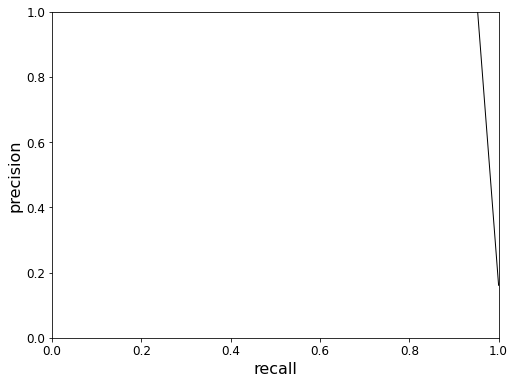

In [304]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "k-", linewidth=1)
    plt.xlabel("recall", fontsize=16)
    plt.ylabel("precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
# save_fig("precision_vs_recall_plot")
plt.show()